In [4]:
#1
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def draw_projcetion_line_points(x,y):
    p0 = np.array([x,y])
    p1 = np.dot(aa,p0)

    plt.plot(p0[0],p0[1],'o',color='r')
    plt.plot(p1[0],p1[1],'o',color='b')
    plt.plot([p0[0],p1[0]],[p0[1],p1[1]],
             color='k', linestyle='-', linewidth=1)

def draw_axes(x_min,x_max,y_min,y_max):
    plt.hlines(0, x_min, x_max, color='k', linestyle='-',
               linewidth=1)
    plt.vlines(0, y_min, y_max, color='k', linestyle='-',
               linewidth=1)
    
import numpy as np
from pprint import pprint
import scipy.linalg as linalg

np.set_printoptions(precision=5, suppress=True)

#！！！！配列です！！！！変えてね！！！！
aa = np.array([[4,-1,-1], [1,2,-1],[3,-1,0]])
#pprint(aa)
#a = np.array([[3,2/3], [2/3,2]])
l,P = np.linalg.eig(aa)
print("固有値")
pprint(l) #！！！固有値！！！
print("固有ベクトル")
pprint(P) #！！！固有ベクトル！！！

固有値
array([1., 3., 2.])
固有ベクトル
array([[-0.40825, -0.70711, -0.57735],
       [-0.40825, -0.     , -0.57735],
       [-0.8165 , -0.70711, -0.57735]])


In [5]:
#2
from decimal import *
from numpy import sqrt
def solve_normal_formula(a,b,c):
    x0=(-b-sqrt(b**2-4*a*c))/(2*a)
    x1=(-b+sqrt(b**2-4*a*c))/(2*a)
    return (x0,x1)

def solve_precise_formula(a,b,c):
    x0=(-b-sqrt(b**2-4*a*c))/(2*a)
    x1=c/(a*x0)
    return (x0,x1)

In [6]:
getcontext().prec = 4

print(solve_normal_formula(Decimal('1'),
                           Decimal('40'),
                           Decimal('2')))
print(solve_precise_formula(Decimal('1'),
                            Decimal('40'),
                            Decimal('2')))

(Decimal('-39.95'), Decimal('-0.05'))
(Decimal('-39.95'), Decimal('-0.05006'))


1/3
1 0.5 0.16666666666666669
1 0.375 0.16666666666666669
2 0.34375 0.041666666666666685
4 0.3359375 0.010416666666666685
8 0.333984375 0.002604166666666685
16 0.33349609375 0.0006510416666666852
32 0.3333740234375 0.00016276041666668517
64 0.333343505859375 4.069010416668517e-05
128 0.33333587646484375 1.017252604168517e-05
256 0.33333396911621094 2.5431315104351704e-06
512 0.33333349227905273 6.357828776226704e-07


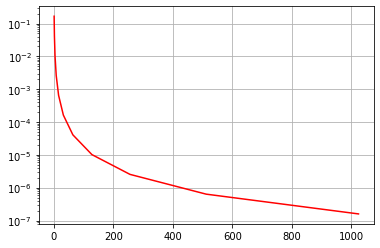

In [42]:
#3
import numpy as np
from sympy import *

def func(x):
    return x**2

x=symbols('x')
print(integrate(x**2,(x,0,1)))

#台形則
def trap(N):
    x0, xn =0.0, 1.0

    h = (xn-x0)/N
    S = func(x0)/2.0
    for i in range(1, N):
        xi = x0 + i*h
        dS = func(xi)
        S = S + dS

    S = S + func(xn)/2.0
    return S*h

x, y = [], []
for i in range(0,11):
    x.append(2**i)
    y.append(abs(trap(2**i)-1/3))
    
    print(x[i-1],trap(2**i),y[i-1])

#片対数プロット
plt.plot(x, y, color = 'r')
plt.yscale('log')
plt.grid()
plt.show()

[17.34679]


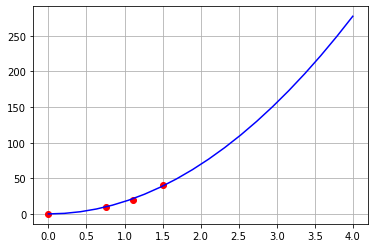

[-2.40099080206130, 2.40099080206130]


In [52]:
#4

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#！！！元の関数を変えてね！！！
def f(x, a0):
    return a0*x**2

xdata = np.array([0,0.751,1.113,1.504])
ydata = np.array([0,10,20,40])
plt.plot(xdata,ydata, 'o', color='r')

params, cov = curve_fit(f, xdata, ydata)
print(params)

x =np.linspace(0,4,20)
y = f(x,params[0])
plt.plot(x,y, color='b')

plt.grid()
plt.show()

#100mを通過する時間
a=params[0]
t=symbols('t')
ans=solve(f(t,a)-100,t)
print(ans)

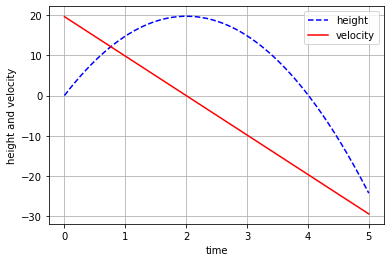

In [60]:
#5

import matplotlib.pyplot as plt

def euler(x0, v0):
  v1 = v0 - g * dt
  x1 = x0 + v0 * dt
  return x1, v1

def my_plot(xx, vv, tt):
    plt.plot(tt, xx, color = 'b', linestyle='--',label="height")
    plt.plot(tt, vv, color = 'r', label="velocity")
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('height and velocity')
    plt.grid()
    plt.show()
    
#g, dt =9.8, 0.01
g, dt =9.8, 0.01  ##ここ変えたよ！！！　g:重力加速度 dt:きざみ
# tt,xx,vv=[0.0],[10.0],[0.0] #for compare rain_drop
tt,xx,vv=[0.0],[0.0],[19.6]  #xx:高さ
#tt,xx,vv=[10.0],[0.0],[0.0]

t = 0.0

#！！！表示されるサイズによって回数かえてね！！！
#(元はin range(0, 220))
for i in range(0,500): #250 for compare rain_drop
  t += dt
  x, v = euler(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

# print(xx)
# print(vv)
my_plot(xx, vv, tt)

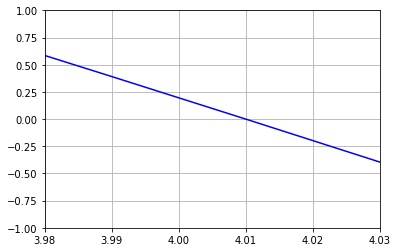

In [70]:
#部分的にプロット

plt.plot(tt,xx,color='b')
plt.plot(tt,vv,color='r')
plt.xlim(3.98,4.03)
plt.ylim(-1,1)

plt.grid()
plt.show()